## Machine Learning Strategy——based on SVM to prefict stock returns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import seaborn
%matplotlib inline

### 1. Data Collection

In [2]:
hs300 = ts.get_k_data('hs300', '2010-01-01', '2020-06-30')
hs300.set_index('date',inplace = True)
hs300.index = pd.to_datetime(hs300.index)    
hs300.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,volume,code
date,,,,,,
2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300
2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300
2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300
2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300
2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300


In [3]:
hs300.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2010-01-04 to 2020-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2548 non-null   float64
 1   close   2548 non-null   float64
 2   high    2548 non-null   float64
 3   low     2548 non-null   float64
 4   volume  2548 non-null   float64
 5   code    2548 non-null   object 
dtypes: float64(5), object(1)
memory usage: 139.3+ KB


In [4]:
hs300_close = hs300['close']

<AxesSubplot:title={'center':'hs300'}, xlabel='date'>

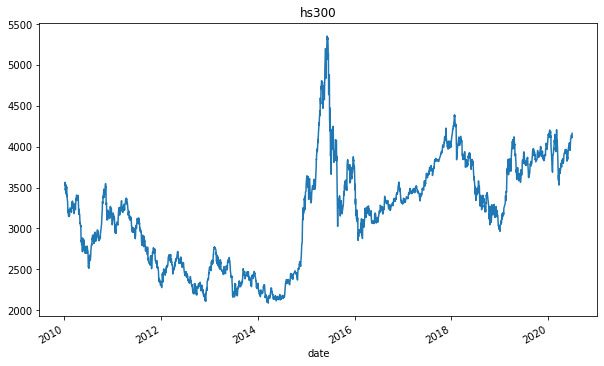

In [39]:
hs300['close'].plot(figsize = (10,6),title = 'hs300')
# hs300.close.plot(figsize = (8,6),title = 'hs300')

### 2. Feature Engineering

In [6]:
for i in range(1, 21, 1):
    hs300['close - ' + str(i) + 'd'] = hs300['close'].shift(i)

In [7]:
hs300.head(21)

,open,close,high,low,volume,code,close - 1d,close - 2d,close - 3d,close - 4d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3592.468,3535.229,3597.75,3535.23,66101080.0,hs300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,3545.186,3564.038,3577.53,3497.66,85809641.0,hs300,3535.229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,3558.700,3541.727,3588.83,3541.17,78473125.0,hs300,3564.038,3535.229,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,3543.160,3471.456,3558.56,3452.77,80350037.0,hs300,3541.727,3564.038,3535.229,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,3456.908,3480.130,3482.08,3426.70,60790253.0,hs300,3471.456,3541.727,3564.038,3535.229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,3593.106,3482.052,3594.53,3465.32,89980172.0,hs300,3480.130,3471.456,3541.727,3564.038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,3477.842,3534.916,3535.41,3437.66,93743278.0,hs300,3482.052,3480.130,3471.456,3541.727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,3448.291,3421.144,3490.11,3415.69,112457901.0,hs300,3534.916,3482.052,3480.130,3471.456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,3433.472,3469.051,3470.32,3411.81,83353252.0,hs300,3421.144,3534.916,3482.052,3480.130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
hs_20d = hs300[[x for x in hs300.columns if 'close' in x]].iloc[20:]

In [9]:
hs_20d.head()

,close,close - 1d,close - 2d,close - 3d,close - 4d,close - 5d,close - 6d,close - 7d,close - 8d,close - 9d,...,close - 11d,close - 12d,close - 13d,close - 14d,close - 15d,close - 16d,close - 17d,close - 18d,close - 19d,close - 20d
date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,3152.707,3204.155,3206.570,3198.566,3242.797,3328.014,3366.197,3408.574,3394.434,3507.482,...,3482.738,3469.051,3421.144,3534.916,3482.052,3480.130,3471.456,3541.727,3564.038,3535.229
2010-02-02,3146.189,3152.707,3204.155,3206.570,3198.566,3242.797,3328.014,3366.197,3408.574,3394.434,...,3500.684,3482.738,3469.051,3421.144,3534.916,3482.052,3480.130,3471.456,3541.727,3564.038
2010-02-03,3230.715,3146.189,3152.707,3204.155,3206.570,3198.566,3242.797,3328.014,3366.197,3408.574,...,3507.482,3500.684,3482.738,3469.051,3421.144,3534.916,3482.052,3480.130,3471.456,3541.727
2010-02-04,3218.802,3230.715,3146.189,3152.707,3204.155,3206.570,3198.566,3242.797,3328.014,3366.197,...,3394.434,3507.482,3500.684,3482.738,3469.051,3421.144,3534.916,3482.052,3480.130,3471.456
2010-02-05,3153.087,3218.802,3230.715,3146.189,3152.707,3204.155,3206.570,3198.566,3242.797,3328.014,...,3408.574,3394.434,3507.482,3500.684,3482.738,3469.051,3421.144,3534.916,3482.052,3480.130


In [10]:
hs_20d = hs_20d.iloc[:,::-1]     

In [11]:
hs_20d.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,3535.229,3564.038,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,...,3507.482,3394.434,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707
2010-02-02,3564.038,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,...,3394.434,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189
2010-02-03,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,...,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715
2010-02-04,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,3394.434,...,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715,3218.802
2010-02-05,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,3394.434,3408.574,...,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715,3218.802,3153.087


### 3. Performance on test-sample

In [12]:
from sklearn import svm

In [13]:
clf = svm.SVR(kernel='linear') 

#### 3.1 generate traing and test set

In [14]:
# just a demo. we can also use tran_test_split
features_train = hs_20d[:2000]  
features_train.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,3535.229,3564.038,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,...,3507.482,3394.434,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707
2010-02-02,3564.038,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,...,3394.434,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189
2010-02-03,3541.727,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,...,3408.574,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715
2010-02-04,3471.456,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,3394.434,...,3366.197,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715,3218.802
2010-02-05,3480.130,3482.052,3534.916,3421.144,3469.051,3482.738,3500.684,3507.482,3394.434,3408.574,...,3328.014,3242.797,3198.566,3206.570,3204.155,3152.707,3146.189,3230.715,3218.802,3153.087


In [15]:
labels_train = hs_20d['close'].shift(-1)[:2000]     
labels_train.head()

date
2010-02-01    3146.189
2010-02-02    3230.715
2010-02-03    3218.802
2010-02-04    3153.087
2010-02-05    3150.988
Name: close, dtype: float64

In [16]:
features_test = hs_20d[2000:]
features_test.head()

,close - 20d,close - 19d,close - 18d,close - 17d,close - 16d,close - 15d,close - 14d,close - 13d,close - 12d,close - 11d,...,close - 9d,close - 8d,close - 7d,close - 6d,close - 5d,close - 4d,close - 3d,close - 2d,close - 1d,close
date,,,,,,,,,,,,,,,,,,,,,
2018-04-27,3842.72,3894.05,3898.50,3886.92,3862.48,3854.86,3852.93,3927.17,3938.34,3898.64,...,3808.86,3748.64,3766.28,3811.84,3760.85,3766.33,3843.49,3828.70,3755.49,3756.88
2018-05-02,3894.05,3898.50,3886.92,3862.48,3854.86,3852.93,3927.17,3938.34,3898.64,3871.14,...,3748.64,3766.28,3811.84,3760.85,3766.33,3843.49,3828.70,3755.49,3756.88,3763.65
2018-05-03,3898.50,3886.92,3862.48,3854.86,3852.93,3927.17,3938.34,3898.64,3871.14,3808.86,...,3766.28,3811.84,3760.85,3766.33,3843.49,3828.70,3755.49,3756.88,3763.65,3793.00
2018-05-04,3886.92,3862.48,3854.86,3852.93,3927.17,3938.34,3898.64,3871.14,3808.86,3748.64,...,3811.84,3760.85,3766.33,3843.49,3828.70,3755.49,3756.88,3763.65,3793.00,3774.60
2018-05-07,3862.48,3854.86,3852.93,3927.17,3938.34,3898.64,3871.14,3808.86,3748.64,3766.28,...,3760.85,3766.33,3843.49,3828.70,3755.49,3756.88,3763.65,3793.00,3774.60,3834.19


In [17]:
labels_test = hs_20d['close'].shift(-1)[2000:]
labels_test.tail()

date
2020-06-22    4121.79
2020-06-23    4138.99
2020-06-24    4109.72
2020-06-29    4163.96
2020-06-30        NaN
Name: close, dtype: float64

#### 3.2 Model Training

In [18]:
clf.fit(features_train, labels_train)     

SVR(kernel='linear')

In [19]:
predict = clf.predict(features_test)    

In [20]:
df = pd.DataFrame(labels_test)

In [21]:
df['predict'] = predict     
df = df.rename(columns = {'close': 'Next Close', 'predict':'Predict Next Close'})

In [22]:
df.head()

,Next Close,Predict Next Close
date,,
2018-04-27,3763.65,3717.692053
2018-05-02,3793.00,3702.302245
2018-05-03,3774.60,3732.859553
2018-05-04,3834.19,3797.729782
2018-05-07,3878.68,3963.850865


In [23]:
current_close = hs_20d[['close']].iloc[2000:]
current_close.head()

,close
date,
2018-04-27,3756.88
2018-05-02,3763.65
2018-05-03,3793.00
2018-05-04,3774.60
2018-05-07,3834.19


In [24]:
next_open = hs300[['open']].iloc[2020:].shift(-1)    
next_open.head()

,open
date,
2018-04-27,3769.93
2018-05-02,3756.17
2018-05-03,3784.32
2018-05-04,3782.54
2018-05-07,3834.61


In [25]:
df1 = pd.merge(df, current_close, left_index=True, right_index=True)
df1.head()

,Next Close,Predict Next Close,close
date,,,
2018-04-27,3763.65,3717.692053,3756.88
2018-05-02,3793.00,3702.302245,3763.65
2018-05-03,3774.60,3732.859553,3793.00
2018-05-04,3834.19,3797.729782,3774.60
2018-05-07,3878.68,3963.850865,3834.19


In [26]:
df2 = pd.merge(df1, next_open, left_index=True, right_index=True)

In [27]:
df2.head()

,Next Close,Predict Next Close,close,open
date,,,,
2018-04-27,3763.65,3717.692053,3756.88,3769.93
2018-05-02,3793.00,3702.302245,3763.65,3756.17
2018-05-03,3774.60,3732.859553,3793.00,3784.32
2018-05-04,3834.19,3797.729782,3774.60,3782.54
2018-05-07,3878.68,3963.850865,3834.19,3834.61


In [28]:
df2.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']

In [29]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2018-04-27,3763.65,3717.692053,3756.88,3769.93
2018-05-02,3793.00,3702.302245,3763.65,3756.17
2018-05-03,3774.60,3732.859553,3793.00,3784.32
2018-05-04,3834.19,3797.729782,3774.60,3782.54
2018-05-07,3878.68,3963.850865,3834.19,3834.61


#### 3.3 Model Logic

In [41]:

df2['Signal'] = np.where(df2['Predicted Next Close'] > df2['Next Open'] + 5,1,0)

#### 3.4 Return and Visualization

In [31]:
df2['PL'] =  np.where(df2['Signal'] == 1,(df2['Next Close'] - df2['Next Open'])/df2['Next Open'],0)

In [32]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL
date,,,,,,
2018-04-27,3763.65,3717.692053,3756.88,3769.93,0,0.000000
2018-05-02,3793.00,3702.302245,3763.65,3756.17,0,0.000000
2018-05-03,3774.60,3732.859553,3793.00,3784.32,0,0.000000
2018-05-04,3834.19,3797.729782,3774.60,3782.54,1,0.013655
2018-05-07,3878.68,3963.850865,3834.19,3834.61,1,0.011493


In [33]:
df2['Strategy'] = (df2['PL'].shift(1)+1).cumprod()
df2['return'] = (df2['Current Close'].pct_change()+1).cumprod()

In [34]:
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
date,,,,,,,,
2018-04-27,3763.65,3717.692053,3756.88,3769.93,0,0.000000,NaN,NaN
2018-05-02,3793.00,3702.302245,3763.65,3756.17,0,0.000000,1.000000,1.001802
2018-05-03,3774.60,3732.859553,3793.00,3784.32,0,0.000000,1.000000,1.009614
2018-05-04,3834.19,3797.729782,3774.60,3782.54,1,0.013655,1.000000,1.004717
2018-05-07,3878.68,3963.850865,3834.19,3834.61,1,0.011493,1.013655,1.020578


<AxesSubplot:xlabel='date'>

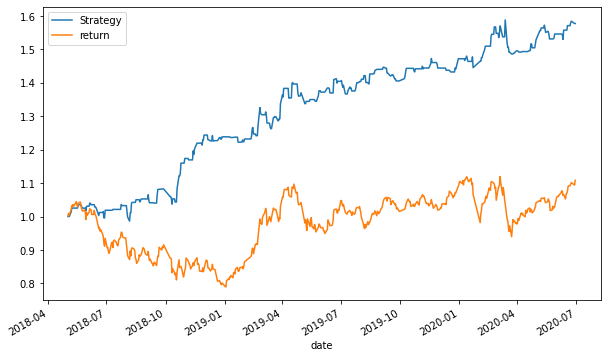

In [35]:
df2[['Strategy','return']].dropna().plot(figsize=(10, 6))